In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import random

## Problem 1: Create graphs

### Problem 1a:  A small practice graph

In [3]:
practice_graph = nx.Graph()

practice_graph.add_node("A")
practice_graph.add_node("B")
practice_graph.add_node("C")
practice_graph.add_node("D")
practice_graph.add_node("E")
practice_graph.add_node("F")

practice_graph.add_edge("A", "B")
practice_graph.add_edge("A", "C")
practice_graph.add_edge("B", "C")
practice_graph.add_edge("B", "D")
practice_graph.add_edge("C", "D")
practice_graph.add_edge("C", "F")
practice_graph.add_edge("D", "E")
practice_graph.add_edge("D", "F")

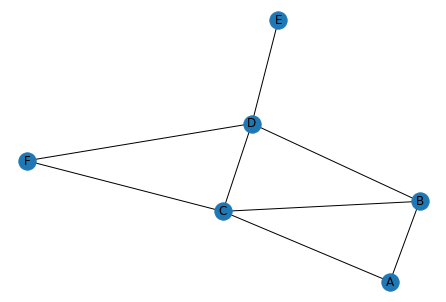

In [4]:
nx.draw(practice_graph, with_labels=True)

### Problem 1b: The Romeo and Juliet graph

In [100]:
rj = nx.Graph()

rj.add_node("Nurse")
rj.add_node("Juliet")
rj.add_node("Tybalt")
rj.add_node("Capulet")
rj.add_node("Friar Laurence")
rj.add_node("Romeo")
rj.add_node("Benvolio")
rj.add_node("Montague")
rj.add_node("Mercutio")
rj.add_node("Escalus")
rj.add_node("Paris")

rj.add_edge("Juliet", "Nurse")
rj.add_edge("Juliet", "Tybalt")
rj.add_edge("Juliet", "Friar Laurence")
rj.add_edge("Juliet", "Romeo")
rj.add_edge("Juliet", "Capulet")
rj.add_edge("Tybalt", "Capulet")
rj.add_edge("Capulet", "Escalus")
rj.add_edge("Capulet", "Paris")
rj.add_edge("Friar Laurence", "Romeo")
rj.add_edge("Romeo", "Benvolio")
rj.add_edge("Romeo", "Montague")
rj.add_edge("Romeo", "Mercutio")
rj.add_edge("Benvolio", "Montague")
rj.add_edge("Montague", "Escalus")
rj.add_edge("Escalus", "Mercutio")
rj.add_edge("Escalus", "Paris")
rj.add_edge("Mercutio", "Paris")

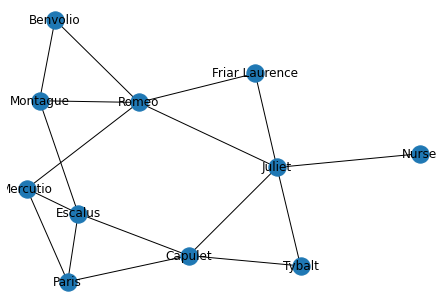

In [6]:
nx.draw(rj, with_labels=True)

## Problem 2: Recommend by number of common friends

Write the following 5 functions, whose documentation strings appear in the template file social_network.py that you were provided.

- friends_of_friends
    - a good solution is 4 lines long
- common_friends
    - a good solution to common_friends is 1 line long
- number_of_common_friends_map
- number_map_to_sorted_list
    - You may want to use the key argument to the sort routine. Furthermore, you may find the operator.itemgetter routine useful as the key argument. For details, see the Python Sorting HowTo
    - There are multiple ways to sort primarily on criterion c1, and to sort on criterion c2 wherever c1 does not make a distinction. One way is to first sort with respect to c2, then sort with respect to c1. This works because when Python sorts, it retains the ordering of any items whose sort keys are equal. (Another way is to use, as the sort key, a tuple/list of all the sort criteria. A way to do this is with a key expression like itemgetter(1, 0). This works because Python, when comparing a tuple/list, does so lexicographically (element-by-element, stopping when there is any difference.) For details, see the Python Sorting HowTo
- recommend_by_number_of_common_friends

In [7]:
def friends(graph, user):
    """Returns a set of the friends of the given user, in the given graph.
    The parameter 'user' is the string name of a person in the graph.
    """
    return set(graph.neighbors(user))

In [8]:
set(rj.neighbors("Juliet")).union(set(rj.neighbors("Romeo")))

{'Benvolio',
 'Capulet',
 'Friar Laurence',
 'Juliet',
 'Mercutio',
 'Montague',
 'Nurse',
 'Romeo',
 'Tybalt'}

In [9]:
nn = set(friends(rj, "Juliet"))
nn

{'Capulet', 'Friar Laurence', 'Nurse', 'Romeo', 'Tybalt'}

In [10]:
full_nn = set()
for neighbor in nn:
#     print(neighbor, '\n', friends(rj, neighbor))
    full_nn = full_nn.union(friends(rj, neighbor))
full_nn

{'Benvolio',
 'Capulet',
 'Escalus',
 'Friar Laurence',
 'Juliet',
 'Mercutio',
 'Montague',
 'Paris',
 'Romeo',
 'Tybalt'}

In [11]:
full_nn

{'Benvolio',
 'Capulet',
 'Escalus',
 'Friar Laurence',
 'Juliet',
 'Mercutio',
 'Montague',
 'Paris',
 'Romeo',
 'Tybalt'}

In [12]:
set("Juliet", )

{'J', 'e', 'i', 'l', 't', 'u'}

In [13]:
{"Juliet"}

{'Juliet'}

In [14]:
def friends_of_friends(graph, user):
    """Returns a set of friends of friends of the given user, in the given graph.
    The result does not include the given user nor any of that user's friends.
    """
    full_friend_set = set()
    nearest_neighbors = set(friends(graph, user))
    for neighbor in nearest_neighbors:
        full_friend_set = full_friend_set.union(friends(graph, neighbor))
    friends_of_friends = full_friend_set - nearest_neighbors.union({user})
    return friends_of_friends
        
assert friends_of_friends(rj, "Mercutio") == set(['Benvolio', 'Capulet', 'Friar Laurence', 'Juliet', 'Montague'])

In [15]:
def common_friends(graph, user1, user2):
    """Returns the set of friends that user1 and user2 have in common."""
    return friends(graph, user1).intersection(friends(graph, user2))

assert common_friends(practice_graph,"A", "B") == set(['C'])
assert common_friends(practice_graph,"A", "D") == set(['B', 'C'])
assert common_friends(practice_graph,"A", "E") == set([])
assert common_friends(practice_graph,"A", "F") == set(['C'])

assert common_friends(rj, "Mercutio", "Nurse") == set()
assert common_friends(rj, "Mercutio", "Romeo") == set()
assert common_friends(rj, "Mercutio", "Juliet") == set(["Romeo"])
assert common_friends(rj, "Mercutio", "Capulet") == set(["Escalus", "Paris"])

In [16]:
def number_of_common_friends_map(graph, user):
    """Returns a map from each user U to the number of friends U has in common with the given user.
    The map keys are the users who have at least one friend in common with the
    given user, and are neither the given user nor one of the given user's friends.
    Take a graph G for example:
        - A and B have two friends in common
        - A and C have one friend in common
        - A and D have one friend in common
        - A and E have no friends in common
        - A is friends with D
    number_of_common_friends_map(G, "A")  =>   { 'B':2, 'C':1 }
    """
    map_dict = {}
    for nn in friends_of_friends(graph, user):
        map_dict[nn] = len(common_friends(graph, user, nn))
    return map_dict

assert number_of_common_friends_map(practice_graph, "A") == {'D': 2, 'F': 1}

assert number_of_common_friends_map(rj, "Mercutio") == { 'Benvolio': 1, 'Capulet': 2, 'Friar Laurence': 1, 'Juliet': 1, 'Montague': 2 }

In [17]:
test_sort = number_of_common_friends_map(rj, "Mercutio")
test_sort

{'Capulet': 2, 'Montague': 2, 'Benvolio': 1, 'Friar Laurence': 1, 'Juliet': 1}

In [18]:
sorted(test_sort.items())

[('Benvolio', 1),
 ('Capulet', 2),
 ('Friar Laurence', 1),
 ('Juliet', 1),
 ('Montague', 2)]

In [19]:
[x[0] for x in sorted(sorted(test_sort.items()), key=lambda person: person[1], reverse=True)]

['Capulet', 'Montague', 'Benvolio', 'Friar Laurence', 'Juliet']

In [20]:
def number_map_to_sorted_list(graph_map):
    """Given a map whose values are numbers, return a list of the keys.
    The keys are sorted by the number they map to, from greatest to least.
    When two keys map to the same number, the keys are sorted by their
    natural sort order, from least to greatest."""
    return [x[0] for x in sorted(sorted(graph_map.items()), key=lambda node: node[1], reverse=True)]

assert number_map_to_sorted_list({"a":5, "b":2, "c":7, "d":5, "e":5}) == ['c', 'a', 'd', 'e', 'b']
print(number_map_to_sorted_list({"a":5, "b":2, "c":7, "d":5, "e":5}))

['c', 'a', 'd', 'e', 'b']


In [21]:
def recommend_by_number_of_common_friends(graph, user):
    """Return a list of friend recommendations for the given user.
    The friend recommendation list consists of names of people in the graph
    who are not yet a friend of the given user.
    The order of the list is determined by the number of common friends.
    """
    graph_map = number_of_common_friends_map(graph, user)
    recommendation = number_map_to_sorted_list(graph_map)
    return recommendation


assert recommend_by_number_of_common_friends(practice_graph,"A") == ['D', 'F']
print(recommend_by_number_of_common_friends(practice_graph,"A"))

assert recommend_by_number_of_common_friends(rj, "Mercutio") == ['Capulet', 'Montague', 'Benvolio', 'Friar Laurence', 'Juliet']
print(recommend_by_number_of_common_friends(rj, "Mercutio"))

['D', 'F']
['Capulet', 'Montague', 'Benvolio', 'Friar Laurence', 'Juliet']


## Problem 3: Recommend by influence

Account for the number of friends of friends in the recommendation.

Do not change the code that you wrote for Problem 2. However, you can reuse most of it. You can solve the problem with just the two new functions (influence_map and recommend_by_influence), plus re-using some unchanged functions from Problem 2

Psudo code:

- Find friends
    - neighbors()
- Count friends of each friend
    - friends_of_friends()
- Assign reciprocal to each friend of friend
    - 
- Find common friends
    - common_friends()
- Sum the reciprocal for common friends
    - 
- Make recommendation
    - 

In [22]:
friends(rj, "Mercutio")

{'Escalus', 'Paris', 'Romeo'}

In [23]:
friends_of_friends(rj, "Escalus")

{'Benvolio', 'Juliet', 'Romeo', 'Tybalt'}

In [24]:
test_map = {}

for friend in friends(rj, "Mercutio"):
    test_map[friend] = 1/len(friends_of_friends(rj, friend))
print(test_map)

{'Paris': 0.25, 'Escalus': 0.25, 'Romeo': 0.2}


In [25]:
test_map['Romeo'] + test_map['Escalus']

0.45

In [26]:
common_friends(rj, "Mercutio", "Capulet")

{'Escalus', 'Paris'}

In [27]:
sum([test_map[friend] for friend in common_friends(rj, "Mercutio", "Capulet")])

0.5

In [28]:
for friend in friends(rj, "Mercutio"):
    print(friend, ":", friends(rj, friend))

Paris : {'Capulet', 'Escalus', 'Mercutio'}
Escalus : {'Capulet', 'Montague', 'Paris', 'Mercutio'}
Romeo : {'Benvolio', 'Montague', 'Friar Laurence', 'Juliet', 'Mercutio'}


In [29]:
def influence_map(graph, user):
    """Returns a map from each user U to the friend influence, with respect to the given user.
    The map only contains users who have at least one friend in common with U,
    and are neither U nor one of U's friends.
    See the assignment for the definition of friend influence.
    """
    weight_dict = {}
    map_dict = {}
    for friend in friends(graph, user):
        weight_dict[friend] = 1/len(friends(graph, friend))
    for nn in friends_of_friends(graph, user):
        map_dict[nn] = sum([weight_dict[friend] for friend in common_friends(graph, user, nn)])
    return map_dict

assert influence_map(rj, "Mercutio") == { 'Benvolio': 0.2, 'Capulet': 0.5833333333333333, 'Friar Laurence': 0.2, 'Juliet': 0.2, 'Montague': 0.45 }
print(influence_map(rj, "Mercutio"))

{'Capulet': 0.5833333333333333, 'Montague': 0.45, 'Benvolio': 0.2, 'Friar Laurence': 0.2, 'Juliet': 0.2}


In [30]:
def recommend_by_influence(graph, user):
    """Return a list of friend recommendations for the given user.
    The friend recommendation list consists of names of people in the graph
    who are not yet a friend of the given user.
    The order of the list is determined by the influence measurement.
    """
    
    graph_map = influence_map(graph, user)
    recommendation = number_map_to_sorted_list(graph_map)
    return recommendation

    
assert recommend_by_influence(rj, "Mercutio") == ['Capulet', 'Montague', 'Benvolio', 'Friar Laurence', 'Juliet']
print(recommend_by_influence(rj, "Mercutio"))

['Capulet', 'Montague', 'Benvolio', 'Friar Laurence', 'Juliet']


## Problem 4: Does the recommendation algorithm make a difference?

Write code to print a list of people for whom the two approaches make the same recommendations, then print a list of people for whom the two approaches make different recommendations. Each list should be sorted in alphabetical order.

Hint: There are 5 people for whom the recommendations are the same, and 6 people for whom the recommendations are different.

In [31]:
rj.nodes()

NodeView(('Nurse', 'Juliet', 'Tybalt', 'Capulet', 'Friar Laurence', 'Romeo', 'Benvolio', 'Montague', 'Mercutio', 'Escalus', 'Paris'))

In [32]:
ct_recomm = {person:recommend_by_number_of_common_friends(rj, person) for person in rj.nodes}
influence_recomm = {person:recommend_by_influence(rj, person) for person in rj.nodes}

In [33]:
# shared_items = {k: x[k] for k in x if k in y and x[k] == y[k]}

NameError: name 'x' is not defined

In [34]:
{k: ct_recomm[k] for k in ct_recomm if k in influence_recomm and ct_recomm[k] == influence_recomm[k]}

{'Nurse': ['Capulet', 'Friar Laurence', 'Romeo', 'Tybalt'],
 'Friar Laurence': ['Benvolio',
  'Capulet',
  'Mercutio',
  'Montague',
  'Nurse',
  'Tybalt'],
 'Benvolio': ['Escalus', 'Friar Laurence', 'Juliet', 'Mercutio'],
 'Mercutio': ['Capulet', 'Montague', 'Benvolio', 'Friar Laurence', 'Juliet'],
 'Escalus': ['Romeo', 'Benvolio', 'Juliet', 'Tybalt']}

In [32]:
ct_recomm = {person:recommend_by_number_of_common_friends(rj, person) for person in rj.nodes}
influence_recomm = {person:recommend_by_influence(rj, person) for person in rj.nodes}

In [35]:
same_recomm = sorted({k for k in ct_recomm if k in influence_recomm and ct_recomm[k] == influence_recomm[k]})
same_recomm

['Benvolio', 'Escalus', 'Friar Laurence', 'Mercutio', 'Nurse']

In [36]:
diff_recomm = {k: ct_recomm[k] for k in ct_recomm if k in influence_recomm and ct_recomm[k] != influence_recomm[k]}

In [37]:
diff_recomm = sorted({k for k in ct_recomm if k in influence_recomm and ct_recomm[k] != influence_recomm[k]})
diff_recomm

['Capulet', 'Juliet', 'Montague', 'Paris', 'Romeo', 'Tybalt']

## Problem 5: Analysis of the algorithm

In Problem 2, every friend recommendation had a score of 1 or more. In Problem 3, every friend recommendation had a score of less than 1. Will that always be the case?

In your answers.txt file, state whether each influence score will always be less than 1. If your answer is “yes”, explain why. If your answer is “no”, then give the smallest graph that you can that has a friend influence score of 1 or greater. In either case, you do not have to write any code — all your answers will appear in your answers.txt file.

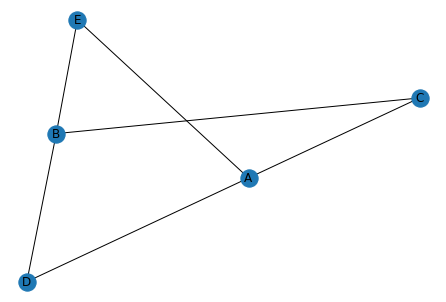

In [38]:
influence_graph = nx.Graph()

influence_graph.add_node("A")
influence_graph.add_node("B")
influence_graph.add_node("C")
influence_graph.add_node("D")
influence_graph.add_node("E")

influence_graph.add_edge("A", "C")
influence_graph.add_edge("A", "D")
influence_graph.add_edge("A", "E")
influence_graph.add_edge("B", "D")
influence_graph.add_edge("B", "C")
influence_graph.add_edge("B", "D")
influence_graph.add_edge("B", "E")

nx.draw(influence_graph, with_labels=True)

In [39]:
influence_map(influence_graph, "A")

{'B': 1.5}

Both nodes A and B have an influence score of 1.5 because each of their (shared) friends have only 2 connections (0.5 + 0.5 + 0.5)

## Problem 6: Randomly choosing a friend connection

Suppose that you wanted to randomly choose a friend connection from a social network. Here are two ways to do this:

- Obtain a list of all the friend connections, and randomly choose one of those.
- Randomly choose a user in the social network, then randomly choose one of their friends. Here, "randomly" means a uniform probability of selecting each element.

The former makes each choice of friend connection equally likely. The latter does not necessarily do so.

In your answers.txt file, describe the smallest graph that you can for which the two approaches lead to different results. In other words, the first approach leads to each edge in the social network graph being chosen with equal probability, and the second approach leads to some edges being more probably to be chosen than others. State the probability of each edge in your example graph being chosen, when using the latter approach.

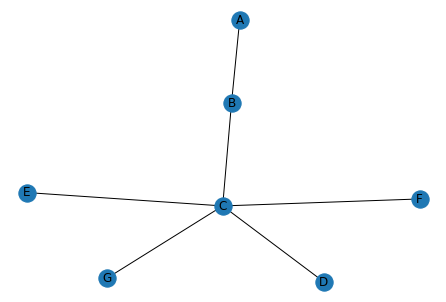

In [40]:
random_graph = nx.Graph()

random_graph.add_node('A')
random_graph.add_node('B')
random_graph.add_node('C')
random_graph.add_node('D')
random_graph.add_node('E')
random_graph.add_node('F')
random_graph.add_node('G')

random_graph.add_edge('A', 'B')
random_graph.add_edge('B', 'C')
random_graph.add_edge('C', 'D')
random_graph.add_edge('C', 'E')
random_graph.add_edge('C', 'F')
random_graph.add_edge('C', 'G')

nx.draw(random_graph, with_labels=True)

For the above graph:

- "Obtain a list of all the friend connections, and randomly choose one of those."
    - Each relationship just as likely to be chosen as any other
- "Randomly choose a user in the social network, then randomly choose one of their friends."
    - Each node has a 1/7 chance of being selected
    - Once the node is selected there is a variable probability of the relationships that can be selected
        - Node A has 1 relationship, so this has a 1/7 (0.1429) probability of being chosen
        - Node C has 5 relationships, so any of its relationships has a 1/7 * 1/5 (0.028557) probability of being chosen

## Problem 7: How good are your recommendations?

You will test the two recommendation systems in the following way:

1. Randomly choose a real friend connection; call the two friends F1 and F2.
2. Remove their friendship from the graph.
3. Compute friend recommendations for F1 and F2.
4. Determine the rank of F1 in F2's list of recommended friends.
    - Determine the rank of F2 in F1's list of recommended friends.
    - If either of these does not exist (e.g., F1 is not recommended as one of F2's friends), discard the F1-F2 pair from your experiment.
    - Otherwise, average these two numbers.
    - The "rank" is also known as the "index" or "position". It starts counting at 1, not 0.
5. Don't forget to put their friendship back in the graph.

For each recommendation system, perform the above experiment 100 times, using the Romeo and Juliet data. Compute the average rank of the correct recommendation within the list of recommendations. (If the correct recommendation does not appear within the list of recommendations, ignore that trial when computing the average rank.)

To prevent different random choices from skewing your results, use the same random choices for both recommendation systems. Another way of saying this is that each time you make a random choice, you should evaluate both recommendation systems using that choice. Then go on to the next choice. Every run of your program will produce slightly different average ranks, but your program should be consistent in terms of which method is better.

In [41]:
list(rj.edges)

[('Nurse', 'Juliet'),
 ('Juliet', 'Tybalt'),
 ('Juliet', 'Friar Laurence'),
 ('Juliet', 'Romeo'),
 ('Juliet', 'Capulet'),
 ('Tybalt', 'Capulet'),
 ('Capulet', 'Escalus'),
 ('Capulet', 'Paris'),
 ('Friar Laurence', 'Romeo'),
 ('Romeo', 'Benvolio'),
 ('Romeo', 'Montague'),
 ('Romeo', 'Mercutio'),
 ('Benvolio', 'Montague'),
 ('Montague', 'Escalus'),
 ('Mercutio', 'Escalus'),
 ('Mercutio', 'Paris'),
 ('Escalus', 'Paris')]

In [44]:
len((rj.edges))

17

In [56]:
random.randint(0, 17)

17

In [57]:
edge_lst = list(rj.edges)
rand = random.randint(0, len(edge_lst))
pair = edge_lst[rand]
print(edge_lst, '\n', rand, '\n', pair)

[('Nurse', 'Juliet'), ('Juliet', 'Tybalt'), ('Juliet', 'Friar Laurence'), ('Juliet', 'Romeo'), ('Juliet', 'Capulet'), ('Tybalt', 'Capulet'), ('Capulet', 'Escalus'), ('Capulet', 'Paris'), ('Friar Laurence', 'Romeo'), ('Romeo', 'Benvolio'), ('Romeo', 'Montague'), ('Romeo', 'Mercutio'), ('Benvolio', 'Montague'), ('Montague', 'Escalus'), ('Mercutio', 'Escalus'), ('Mercutio', 'Paris'), ('Escalus', 'Paris')] 
 9 
 ('Romeo', 'Benvolio')


In [58]:
F1 = pair[0]
F2 = pair[1]
print(F1, '\n', F2)

Romeo 
 Benvolio


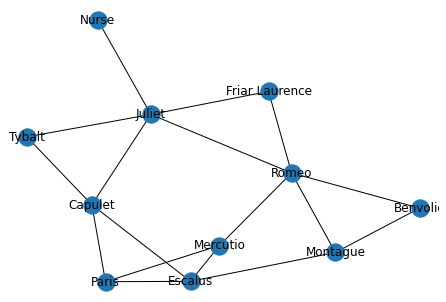

In [61]:
nx.draw(rj, with_labels=True)

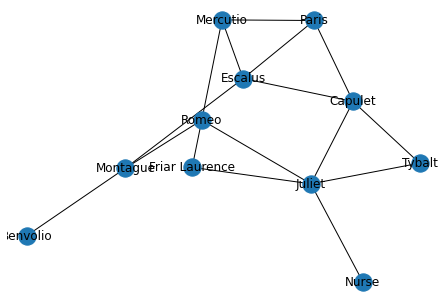

In [62]:
rj.remove_edge(F1, F2)
nx.draw(rj, with_labels=True)

In [63]:
for x in pair:
    print(x)

Romeo
Benvolio


In [64]:
ct_recomm = {person:recommend_by_number_of_common_friends(rj, person) for person in pair}
influence_recomm = {person:recommend_by_influence(rj, person) for person in pair}

print(f'Count recommendation: {ct_recomm:}')
print(f'Influence recommendation: {influence_recomm}')

Count recommendation: {'Romeo': ['Escalus', 'Benvolio', 'Capulet', 'Nurse', 'Paris', 'Tybalt'], 'Benvolio': ['Escalus', 'Romeo']}
Influence recommendation: {'Romeo': ['Escalus', 'Benvolio', 'Paris', 'Capulet', 'Nurse', 'Tybalt'], 'Benvolio': ['Escalus', 'Romeo']}


In [68]:
ct_recomm[F1]

['Escalus', 'Benvolio', 'Capulet', 'Nurse', 'Paris', 'Tybalt']

In [70]:
ct_recomm[F1].index(F2) + 1

2

In [70]:
ct_recomm[F2].index(F1) + 1

2

In [72]:
influence_recomm[F1].index(F2) + 1

2

In [73]:
influence_recomm[F2].index(F1) + 1

2

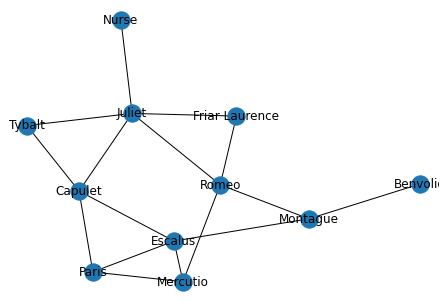

In [75]:
nx.draw(rj, with_labels=True)

In [76]:
rj.add_edge(F1, F2)

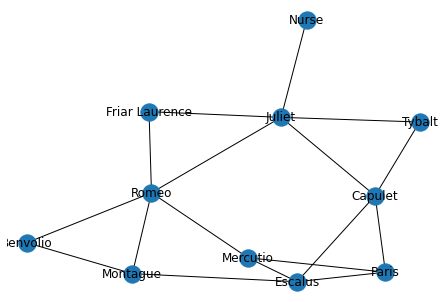

In [78]:
nx.draw(rj, with_labels=True)

In [142]:
def assess_recomm(graph):
    edge_lst = list(graph.edges)
    rand = random.randint(0, len(edge_lst)-1)
    pair = edge_lst[rand]
    F1 = pair[0]
    F2 = pair[1]
    graph.remove_edge(F1, F2)
    ct_recomm = {person:recommend_by_number_of_common_friends(graph, person) for person in pair}
    influence_recomm = {person:recommend_by_influence(graph, person) for person in pair}
    
    try:
        f1_ct_recomm = ct_recomm[F1].index(F2) + 1
        f2_ct_recomm = ct_recomm[F2].index(F1) + 1
        ct_recomm_avg = (f1_ct_recomm + f2_ct_recomm) / 2

        f1_inf_recomm = influence_recomm[F1].index(F2) + 1
        f2_inf_recomm = influence_recomm[F2].index(F1) + 1
        inf_recomm_avg = (f1_inf_recomm + f2_inf_recomm) / 2
    
        ct_lst.append(ct_recomm_avg)
        inf_lst.append(inf_recomm_avg)
    except:
        pass

    graph.add_edge(F1, F2)


In [82]:
ct_lst = []
inf_lst = []

assess_recomm(rj)

In [85]:
assess_recomm(rj)

In [86]:
ct_lst

[4.0, 3.0]

In [87]:
inf_lst

[2.5, 2.5]

In [123]:
ct_lst = []
inf_lst = []

for x in range(100):
    assess_recomm(rj)
    
print(f'The average for the count method is: {sum(ct_lst)/len(ct_lst)}')
print(f'The average for the influence method is: {sum(inf_lst)/len(inf_lst)}')

The average for the count method is: 2.6845238095238093
The average for the influence method is: 2.255952380952381


## Problem 8: Create a Facebook graph

Create a graph named facebook from the Facebook data in file facebook-links.txt. As above, use the Graph class.

Print the number of nodes and the number of edges in your facebook graph. The output should be:

- Facebook nodes: 63731
- Facebook edges: 817090

In [129]:
facebook = nx.read_edgelist("homework4/facebook-links.txt", nodetype = int, data=(("timestamp", str),))
print(facebook.number_of_nodes())
print(facebook.number_of_edges())

63731
817090


## Problem 9: Recommend by number of friends for Facebook

For every Facebook user with an id that is a multiple of 1000, print a list containing the first 10 friend recommendations, as determined by number of common friends. If there are fewer than 10 recommendations, print all the recommendations.

Print output format:

...
28000 ['17125', '7033', '15462', '33049', '51105', '16424', '23', '7996', '1539', '17420']
29000 ['28606']
30000 ['14473', '14495', '17951', '19611', '22749', '23259', '30002', '3154', '8269', '862']

In [134]:
for user in range(1000, len(facebook)-1, 1000):
    print(user, recommend_by_number_of_common_friends(facebook, user)[:10])

1000 [23, 453, 456, 467, 1140, 2068, 451, 469, 472, 746]
2000 [1686, 1693, 639, 1160, 1408, 1436, 1685, 1691, 1692, 1694]
3000 [2868, 1156, 3004, 2260, 3002, 244, 639, 867, 2999, 3018]
4000 [284, 3423, 3978, 4012, 3159, 3975, 3977, 3992, 4003, 4004]
5000 [1685, 2152, 2218, 1686, 1687, 1691, 1693, 2660, 1689, 2141]
6000 [22596, 22599, 6015, 40834, 903, 37969, 5792, 40833, 6010, 5232]
7000 [24649, 20401, 34865, 31156, 20934, 38854, 20010, 6956, 9660, 10221]
8000 [1209, 7999, 17802, 1299, 3169, 4481, 5280, 5615, 6662, 13283]
9000 [19228, 10397, 19231, 1632, 7157, 18388, 19286, 1466, 2217, 18397]
10000 [528, 534, 6027, 6237, 32097, 280, 292, 388, 1304, 1337]
11000 [13477, 25839, 6951, 10621, 22987, 1395, 10885, 21955, 27329, 1181]
12000 [3875, 14877, 14884, 3878, 8423, 3901, 14872, 7507, 8272, 9219]
13000 [25755, 27126, 24543, 7765, 25767, 7108, 14684, 15869, 3579, 7111]
14000 [13609, 1236, 305, 464, 774, 2019, 2097, 2382, 2848, 3733]
15000 [23656, 11731, 14484, 26276, 31526, 32017, 11730,

## Problem 10: Recommend by influence for Facebook

For every Facebook user with an id that is a multiple of 1000, print a list containing the first 10 friend recommendations, as determined by influence score. If there are fewer than 10 recommendations, print all the recommendations.

In [135]:
for user in range(1000, len(facebook)-1, 1000):
    print(user, recommend_by_influence(facebook, user)[:10])

1000 [23, 453, 456, 467, 1140, 1009, 16423, 2068, 1011, 469]
2000 [1686, 1693, 1691, 1692, 2117, 2162, 2163, 2164, 7787, 8821]
3000 [2868, 12623, 4653, 4864, 554, 1156, 639, 3002, 3004, 9033]
4000 [28751, 29830, 33373, 53528, 284, 3423, 3978, 4012, 9401, 13454]
5000 [1685, 2152, 2218, 2141, 1691, 1693, 2660, 1686, 1687, 704]
6000 [22596, 40834, 22599, 6015, 53878, 61092, 58637, 37969, 41627, 903]
7000 [24649, 13775, 28568, 34865, 20401, 7160, 26203, 26206, 20934, 31156]
8000 [1689, 4758, 13523, 20165, 1209, 7999, 17802, 3169, 4481, 6662]
9000 [41322, 7999, 21759, 41321, 19228, 19231, 19286, 18388, 13421, 8988]
10000 [32097, 10452, 280, 552, 12670, 24929, 27028, 53942, 4343, 9989]
11000 [25839, 10885, 13477, 10621, 1395, 22987, 10076, 41993, 42129, 53544]
12000 [27846, 3875, 14877, 14884, 8423, 9219, 3878, 3901, 14872, 14902]
13000 [25755, 27126, 24543, 15869, 25767, 7108, 25823, 12985, 3579, 31248]
14000 [13609, 1236, 464, 8194, 16596, 305, 774, 2848, 4639, 4971]
15000 [23656, 11731, 2

## Problem 11: Does the recommendation algorithm make a difference for Facebook?

Considering only those 63 Facebook users with an id that is a multiple of 1000, compute and print the number of Facebook users who have the same first 10 friend recommendations under both recommendation systems, and the number of Facebook users who have different first 10 friend recommendations under the two recommendation systems.

In [136]:
ct_recomm = {person:recommend_by_number_of_common_friends(facebook, person)[:10] for person in range(1000, len(facebook)-1, 1000)}
influence_recomm = {person:recommend_by_influence(facebook, person)[:10] for person in range(1000, len(facebook)-1, 1000)}

In [138]:
same_recomm = sorted({k for k in ct_recomm if k in influence_recomm and ct_recomm[k] == influence_recomm[k]})
same_recomm

[29000, 37000, 42000, 45000, 49000, 51000, 52000, 54000, 59000, 62000]

In [139]:
diff_recomm = sorted({k for k in ct_recomm if k in influence_recomm and ct_recomm[k] != influence_recomm[k]})
diff_recomm

[1000,
 2000,
 3000,
 4000,
 5000,
 6000,
 7000,
 8000,
 9000,
 10000,
 11000,
 12000,
 13000,
 14000,
 15000,
 16000,
 17000,
 18000,
 19000,
 20000,
 21000,
 22000,
 23000,
 24000,
 25000,
 26000,
 27000,
 28000,
 30000,
 31000,
 32000,
 33000,
 34000,
 35000,
 36000,
 38000,
 39000,
 40000,
 41000,
 43000,
 44000,
 46000,
 47000,
 48000,
 50000,
 53000,
 55000,
 56000,
 57000,
 58000,
 60000,
 61000,
 63000]

## Problem 12: How good are your recommendations for Facebook?

Repeat the procedure you followed for Problem 7, but for the Facebook data.



In [143]:
ct_lst = []
inf_lst = []

for x in range(100):
    assess_recomm(facebook)
    
print(f'The average for the count method is: {sum(ct_lst)/len(ct_lst)}')
print(f'The average for the influence method is: {sum(inf_lst)/len(inf_lst)}')

The average for the count method is: 314.75
The average for the influence method is: 307.30357142857144


influence method wins again